## Flight Price Predection 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('flight_price.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


<Axes: xlabel='Total_Stops', ylabel='Price'>

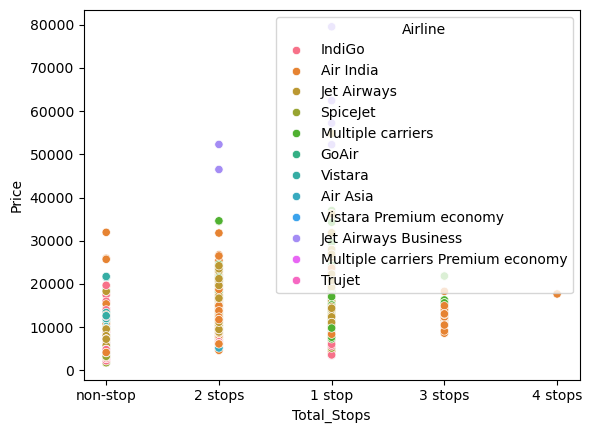

In [6]:
sns.scatterplot(x='Total_Stops',y='Price',hue='Airline',data=df)

In [72]:
# Feature engine for Date of Journey
df['date']= df['Date_of_Journey'].str.split('/').str[0]
df['month']= df['Date_of_Journey'].str.split('/').str[1]
df['year']= df['Date_of_Journey'].str.split('/').str[2]

In [73]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019


In [74]:
# Converting date,month,year(object) into numerical value(int)
df['date']= df['date'].astype(int)
df['month']= df['month'].astype(int)
df['year']= df['year'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  date             10683 non-null  int32 
 12  month            10683 non-null  int32 
 13  year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [76]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [77]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split()[0])

In [78]:
# Feature engine for Arrival time seprating hour and minute
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_minute']=df['Arrival_Time'].str.split(':').str[1]

In [79]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [80]:
# Feature engine for dep time seprating hour and minute
df['Dep_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_minute']=df['Dep_Time'].str.split(':').str[1]

In [81]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50


In [82]:
# Converting Object to int
df['Arrival_hour']= df['Arrival_hour'].astype(int)
df['Arrival_minute']= df['Arrival_minute'].astype(int)
df['Dep_hour']= df['Dep_hour'].astype(int)
df['Dep_minute']= df['Dep_minute'].astype(int)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  date             10683 non-null  int32 
 12  month            10683 non-null  int32 
 13  year             10683 non-null  int32 
 14  Arrival_hour     10683 non-null  int32 
 15  Arrival_minute   10683 non-null  int32 
 16  Dep_hour         10683 non-null  int32 
 17  Dep_minute       10683 non-null

In [84]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [85]:
# Converting 'Total stops' from object to int and removing NaN value from it
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [86]:
df['Total_Stops'].isnull().sum()

1

In [87]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [88]:
df['Total_Stops']= df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [89]:
df['Total_Stops'].isnull().sum()

0

In [90]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,2019,21,35,16,50


In [91]:
# Feature Engine for  duration
df['Duration'].mode()

0    2h 50m
Name: Duration, dtype: object

In [92]:
df['Duration'].isnull().sum()

0

In [93]:
def split_duration(duration):
    duration = duration.strip().split(' ')
    if len(duration)==1:
        hour = duration[0].replace('h','') if 'h' in duration[0] else 0
        min = duration[0].replace('m','') if 'm' in duration[0] else 0
    if len(duration)==2:
        hour = duration[0].replace('h','') if 'h' in duration[0] else 0
        min = duration[1].replace('m','') if 'm' in duration[1] else 0
            


    return int(hour),int(min)

print(split_duration("5m"))


(0, 5)


In [94]:
df[['Duration_hour','Duration_minute']]= df['Duration'].apply(split_duration).apply(pd.Series)


In [95]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour,Duration_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,7,25


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  int64 
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  date             10683 non-null  int32 
 12  month            10683 non-null  int32 
 13  year             10683 non-null  int32 
 14  Arrival_hour     10683 non-null  int32 
 15  Arrival_minute   10683 non-null  int32 
 16  Dep_hour         10683 non-null  int32 
 17  Dep_minute       10683 non-null

In [97]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [98]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [99]:
from sklearn.preprocessing import OneHotEncoder

##### Perfoming FE Airline, Source, Destination into Into

In [100]:
encoder = OneHotEncoder()

In [101]:
encoder.fit_transform(df[['Airline','Source','Destination']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [102]:
encoded_df = pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())

In [103]:
df = pd.concat([df,encoded_df],axis=1)

In [104]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 43 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Airline                                    10683 non-null  object 
 1   Date_of_Journey                            10683 non-null  object 
 2   Source                                     10683 non-null  object 
 3   Destination                                10683 non-null  object 
 4   Route                                      10682 non-null  object 
 5   Dep_Time                                   10683 non-null  object 
 6   Arrival_Time                               10683 non-null  object 
 7   Duration                                   10683 non-null  object 
 8   Total_Stops                                10683 non-null  int64  
 9   Additional_Info                            10683 non-null  object 
 10  Price                 

#### Converting Addition info to int

In [106]:
encoder = OneHotEncoder()

In [107]:
encoder.fit_transform(df[['Additional_Info']]).toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [108]:
encoded_df = pd.DataFrame(encoder.fit_transform(df[['Additional_Info']]).toarray(),columns=encoder.get_feature_names_out())

In [109]:
df = pd.concat([df,encoded_df],axis=1)

In [110]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Airline                                       10683 non-null  object 
 1   Date_of_Journey                               10683 non-null  object 
 2   Source                                        10683 non-null  object 
 3   Destination                                   10683 non-null  object 
 4   Route                                         10682 non-null  object 
 5   Dep_Time                                      10683 non-null  object 
 6   Arrival_Time                                  10683 non-null  object 
 7   Duration                                      10683 non-null  object 
 8   Total_Stops                                   10683 non-null  int64  
 9   Additional_Info                               10683 non-null 

In [112]:
# Droping Columns that conatain object values

df.drop('Airline',axis=1,inplace=True)
df.drop('Date_of_Journey',axis=1,inplace=True)
df.drop('Source',axis=1,inplace=True)
df.drop('Destination',axis=1,inplace=True)
df.drop('Route',axis=1,inplace=True)
df.drop('Dep_Time',axis=1,inplace=True)
df.drop('Arrival_Time',axis=1,inplace=True)
df.drop('Duration',axis=1,inplace=True)
df.drop('Additional_Info',axis=1,inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Total_Stops                                   10683 non-null  int64  
 1   Price                                         10683 non-null  int64  
 2   date                                          10683 non-null  int32  
 3   month                                         10683 non-null  int32  
 4   year                                          10683 non-null  int32  
 5   Arrival_hour                                  10683 non-null  int32  
 6   Arrival_minute                                10683 non-null  int32  
 7   Dep_hour                                      10683 non-null  int32  
 8   Dep_minute                                    10683 non-null  int32  
 9   Duration_hour                                 10683 non-null 

In [114]:
df.head()

,Total_Stops,Price,date,month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,24,3,2019,1,10,22,20,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,7662,1,5,2019,13,15,5,50,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,13882,9,6,2019,4,25,9,25,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6218,12,5,2019,23,30,18,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,13302,1,3,2019,21,35,16,50,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


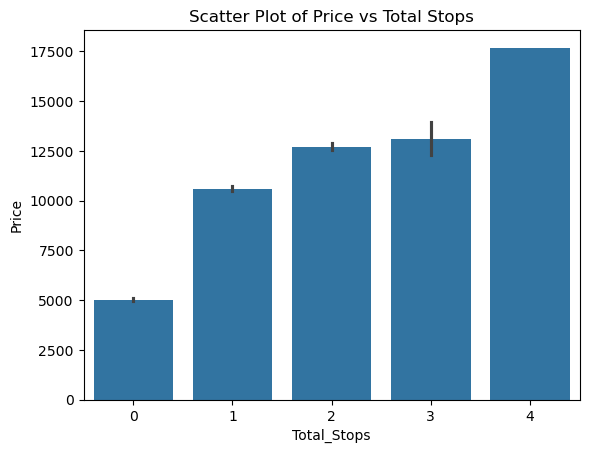

In [115]:
sns.barplot(x='Total_Stops', y='Price', data=df)
plt.title("Scatter Plot of Price vs Total Stops")
plt.show()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Total_Stops                                   10683 non-null  int64  
 1   Price                                         10683 non-null  int64  
 2   date                                          10683 non-null  int32  
 3   month                                         10683 non-null  int32  
 4   year                                          10683 non-null  int32  
 5   Arrival_hour                                  10683 non-null  int32  
 6   Arrival_minute                                10683 non-null  int32  
 7   Dep_hour                                      10683 non-null  int32  
 8   Dep_minute                                    10683 non-null  int32  
 9   Duration_hour                                 10683 non-null 

In [59]:
df.corr()

,Total_Stops,Price,date,month,year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hour,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
Total_Stops,1.000000,0.603883,-0.009472,0.054389,NaN,0.038123,-0.106939,-0.061490,-0.002591,0.739872,...,0.010990,0.016850,0.016850,0.005039,0.044593,0.105721,0.004364,-0.201501,-0.021126,-0.011811
Price,0.603883,1.000000,-0.153738,-0.103651,NaN,0.024264,-0.086155,0.006819,-0.024492,0.508672,...,0.119208,0.037047,0.036495,0.200306,0.042835,0.039825,-0.003789,-0.207384,0.022230,0.003747
date,-0.009472,-0.153738,1.000000,-0.038378,NaN,-0.003192,-0.017511,0.002220,-0.008261,-0.022181,...,-0.056244,-0.014274,-0.014274,-0.028551,-0.037775,0.036193,-0.024725,0.033440,-0.036404,-0.014274
month,0.054389,-0.103651,-0.038378,1.000000,NaN,-0.003941,-0.100626,0.039112,-0.059238,0.016175,...,-0.056219,-0.014199,-0.014199,-0.028401,-0.037577,0.075604,-0.024595,0.013794,-0.065390,-0.014199
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_hour,0.038123,0.024264,-0.003192,-0.003941,NaN,1.000000,-0.154362,0.005215,0.043054,0.055180,...,-0.000527,0.013615,-0.006135,-0.003100,0.021631,-0.016792,0.008922,-0.087718,0.050649,-0.016009
Arrival_minute,-0.106939,-0.086155,-0.017511,-0.100626,NaN,-0.154362,1.000000,0.067909,-0.017594,-0.074439,...,0.009540,0.000181,0.000181,-0.001103,0.001588,-0.045619,0.003699,-0.002695,0.043024,-0.008612
Dep_hour,-0.061490,0.006819,0.002220,0.039112,NaN,0.005215,0.067909,1.000000,-0.024806,0.002783,...,0.003353,-0.007559,-0.010925,-0.021853,-0.011731,0.057619,-0.000459,-0.010224,-0.048512,0.017689
Dep_minute,-0.002591,-0.024492,-0.008261,-0.059238,NaN,0.043054,-0.017594,-0.024806,1.000000,-0.021946,...,0.029143,0.013192,0.010615,0.022521,0.012498,-0.001707,0.003503,0.061986,-0.029454,0.000304
Duration_hour,0.739872,0.508672,-0.022181,0.016175,NaN,0.055180,-0.074439,0.002783,-0.021946,1.000000,...,0.023098,0.004276,0.017943,-0.011382,0.016483,0.192763,-0.012323,-0.171997,-0.112960,-0.009392
